#### The objective of this project is to build a machine learning model using the historical marketing data of an insurance company to  predict whether a Customer will subscribe to the insurance. This prediction will help identify the customers who are most likely to     convert, allowing for targeted telephonic marketing campaigns and cost-effective outreach strategies.

age : age of the Customer.

job : type of job.

marital : marital status.

educational_qual : education status.

call_type : contact communication type.

day : last contact day of the month.

mon : last contact month of year.

dur : last contact duration, in seconds.

num_calls : number of contacts performed during this campaign and for this Customer.

prev_outcome : outcome of the previous marketing campaign.

y - Target variable subscribed or not(Y/N)

In [1]:
## Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:\\Python\\customer.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.shape

(45211, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


### Observations
1. The campaign is targeting those customers whose average age is approximately 41 years
2. On an average, the last day of contact for each customer is approximately 16
3. The average duration for a call to a customer is 258 seconds i.e. 4 min 18 sec
4. Average number of calls made to a customer is approximately 3

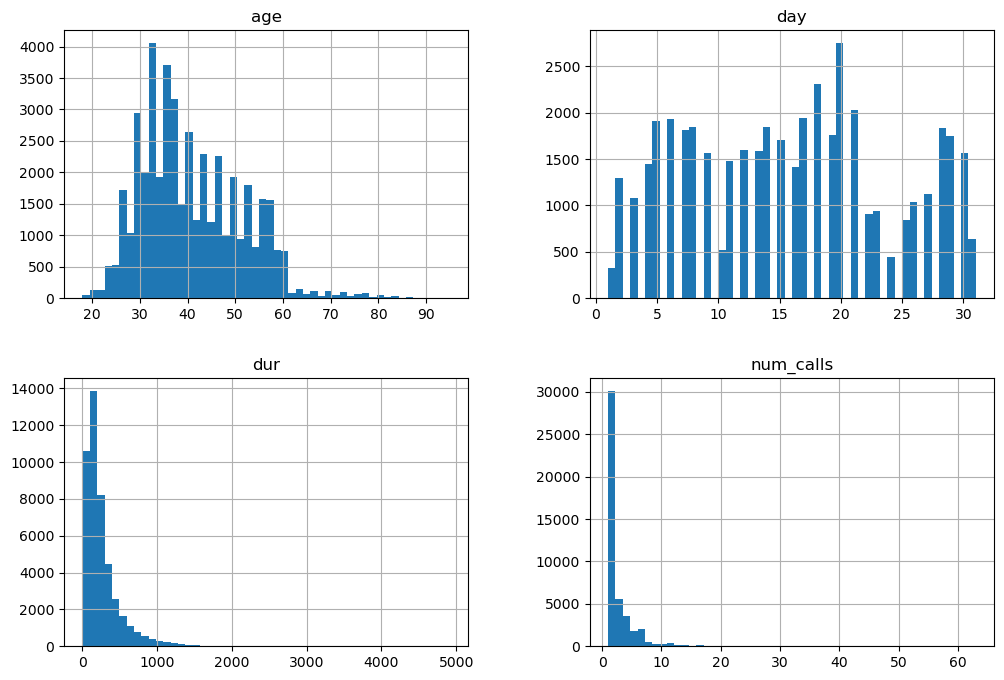

In [6]:
df.hist(bins=50,figsize=(12,8));

### Observations
1. Age is approximately following normal distribution(most of the transactions are being done by the people of age 30-60. This is relevant as people with higher age group will be requiring insurance for their family and personally)


2. Duration and number of calls follows skewed distribution(values are skewed between 0-1000 seconds for duration and maximum calls for the entire campaign are around 10-20) 

In [7]:
## Filter records of call_type having values as "unknown"
missing_records_call_type=df[df['call_type']=='unknown']

In [8]:
len(missing_records_call_type)

13020

In [9]:
## Filter records of prev_outcome having values as "unknown"
missing_records_prev_outcome=df[df['prev_outcome']=='unknown']
len(missing_records_prev_outcome)

36959

In [10]:
## Filling the unknown values with "NaN" 
df['prev_outcome']=np.where(df['prev_outcome']=='unknown',np.nan,df['prev_outcome'])
df['call_type']=np.where(df['call_type']=='unknown',np.nan,df['call_type'])

In [11]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,NaN,5,may,261,1,NaN,no
1,44,technician,single,secondary,NaN,5,may,151,1,NaN,no
2,33,entrepreneur,married,secondary,NaN,5,may,76,1,NaN,no
3,47,blue-collar,married,unknown,NaN,5,may,92,1,NaN,no
4,33,unknown,single,unknown,NaN,5,may,198,1,NaN,no


In [12]:
var=['education_qual','marital','job']

for var in var:
    unique_values=df[var].unique()
    print(f"Number of unique values: {unique_values}")

Number of unique values: ['tertiary' 'secondary' 'unknown' 'primary']
Number of unique values: ['married' 'single' 'divorced']
Number of unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [13]:
len(df[df['education_qual']=='unknown'])

1857

In [14]:
len(df[df['job']=='unknown'])

288

In [15]:
## Filling the unknown values with "NaN"
df['education_qual']=np.where(df['education_qual']=='unknown',np.nan,df['education_qual'])
df['job']=np.where(df['job']=='unknown',np.nan,df['job'])

In [16]:
df.isnull().sum()

age                   0
job                 288
marital               0
education_qual     1857
call_type         13020
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36959
y                     0
dtype: int64

In [17]:
df=df.rename({'y':'Subscribed'},axis=1)

In [18]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Subscribed
0,58,management,married,tertiary,NaN,5,may,261,1,NaN,no
1,44,technician,single,secondary,NaN,5,may,151,1,NaN,no
2,33,entrepreneur,married,secondary,NaN,5,may,76,1,NaN,no
3,47,blue-collar,married,NaN,NaN,5,may,92,1,NaN,no
4,33,NaN,single,NaN,NaN,5,may,198,1,NaN,no


In [19]:
df[['job','education_qual','call_type','prev_outcome']].mode()

,job,education_qual,call_type,prev_outcome
0,blue-collar,secondary,cellular,failure


In [20]:
imputation_dict=df[['job','education_qual','call_type','prev_outcome']].mode().iloc[0].to_dict()
imputation_dict

{'job': 'blue-collar',
 'education_qual': 'secondary',
 'call_type': 'cellular',
 'prev_outcome': 'failure'}

In [21]:
df.fillna(imputation_dict,inplace=True)

In [22]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
Subscribed        0
dtype: int64

### EDA and Data Pre-Processing

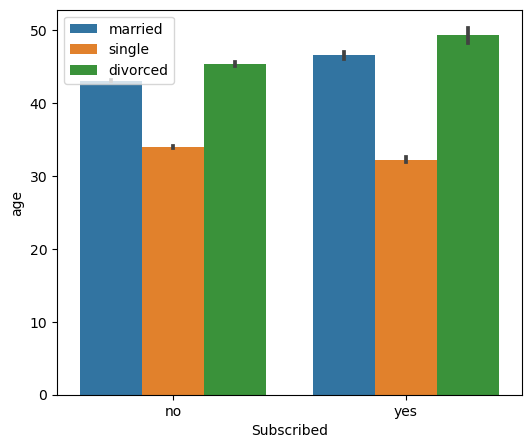

In [23]:
plt.figure(figsize=(6,5))
sns.barplot(data=df,x='Subscribed',y='age',hue='marital')
plt.legend(loc='upper left')

### Observations

We can infer that mostly divorced people with the age group of 40+ are subscribing to the insurance and people who are single between the age group of 10-35 are least interested in subscribing the insurance.

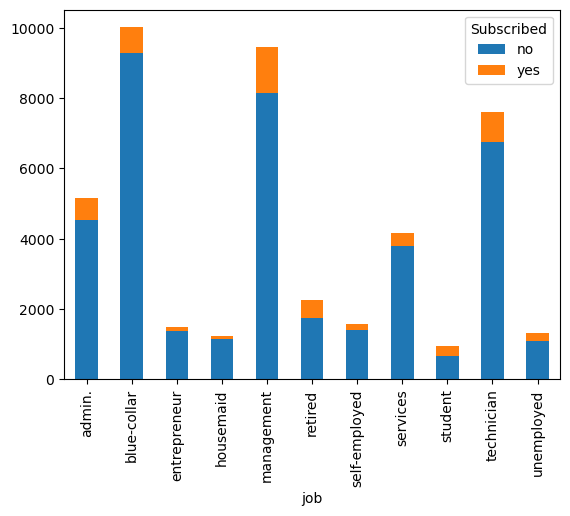

In [24]:
grouped=df.groupby(['job','Subscribed']).size().unstack()
fig,ax=plt.subplots()
grouped.plot(kind='bar',stacked=True,ax=ax)
plt.show()

### Observations
We can observe that people having management jobs are buying the maximum number of insurance and people having blue-collar jobs are not buying insurance at all

In [25]:
import scipy.stats
contingency_table=pd.crosstab(df['prev_outcome'],df['Subscribed'])

chi2,p,dof,expected=scipy.stats.chi2_contingency(contingency_table)

print("Chi Squared Statistic:",chi2)
print('P-value:',p)
print("Degrees of freedom:", dof)
print("Expected frequencies:",expected)


alpha=0.05
if p<alpha:
    print('There is a significant relationship between previous outcome and current subscription')
else:
    print('There is no significant relationship between prev_outcome and subscription')

Chi Squared Statistic: 4341.700212394584
P-value: 0.0
Degrees of freedom: 2
Expected frequencies: [[36963.01608016  4896.98391984]
 [ 1624.74795957   215.25204043]
 [ 1334.23596028   176.76403972]]
There is a significant relationship between previous outcome and current subscription


### Observations
From the chi-square test above there is a significant relationship between the outcome of the previous campaign and the current subscription rates, therefore the company can analyze and formulate strategies for the present marketing campaign on the basis of the outcome of their previous marketing campaign, saving them a lot of time

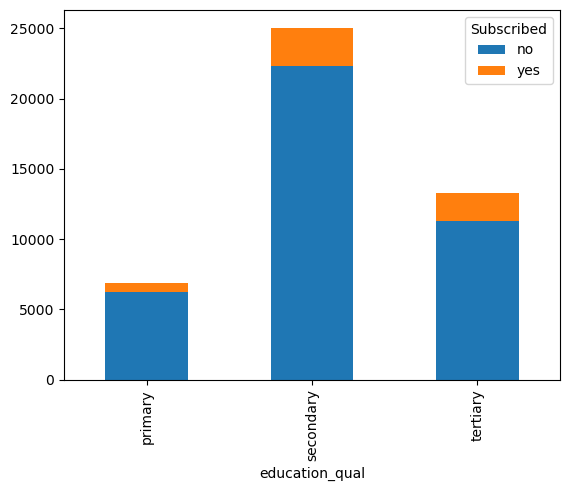

In [26]:
data=df.groupby(['education_qual','Subscribed']).size().unstack()
fig,ax=plt.subplots()
data.plot(kind='bar',stacked=True,ax=ax)
plt.show()

### Observations

The maximum number of transactions are being implemented by that group having secondary education

In [27]:
grouped_month=df.groupby(['mon','Subscribed']).size().unstack().sort_values(by='mon',ascending=False)
grouped_month

Subscribed,no,yes
mon,,
sep,310,269
oct,415,323
nov,3567,403
may,12841,925
mar,229,248
jun,4795,546
jul,6268,627
jan,1261,142
feb,2208,441


In [28]:
df['Subscribed'].value_counts()/len(df['Subscribed'])*100

Subscribed
no     88.30152
yes    11.69848
Name: count, dtype: float64

#### The dataset is highly imbalanced with 88% of values belong to the class "No" and 11% belong to "Yes"

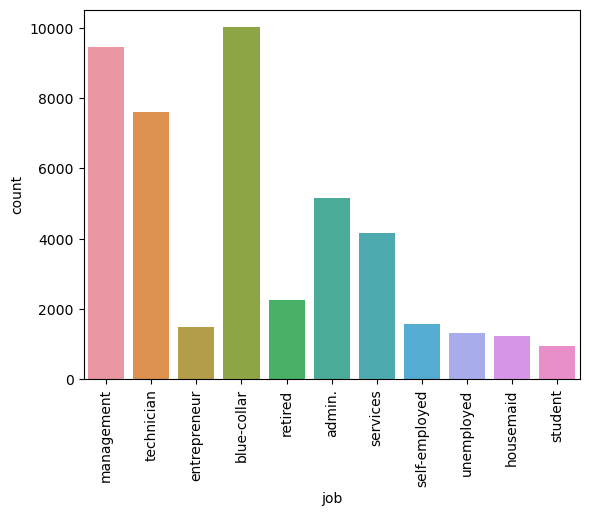

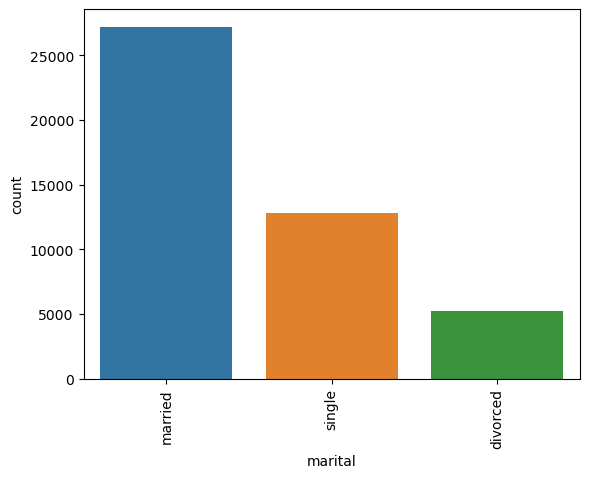

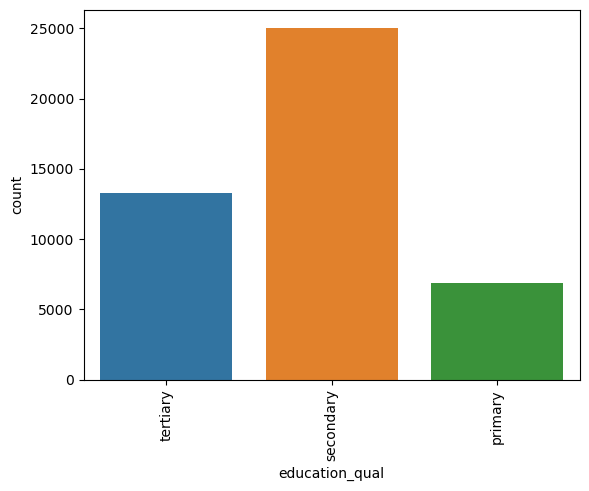

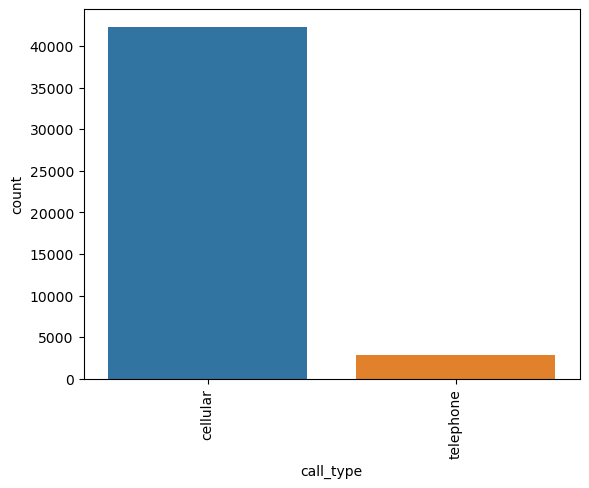

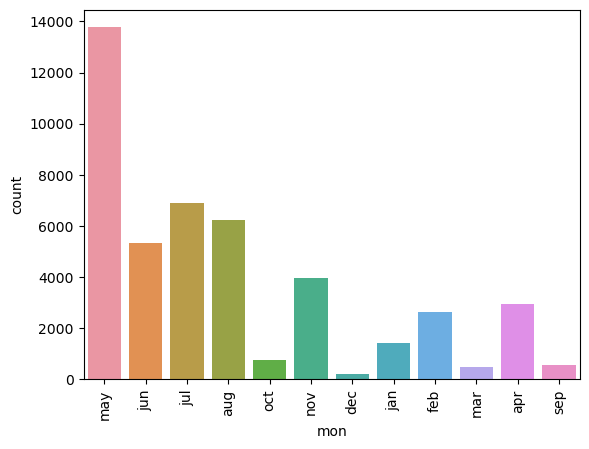

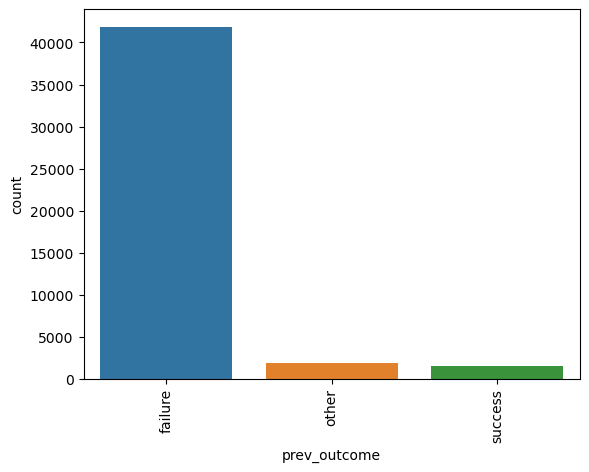

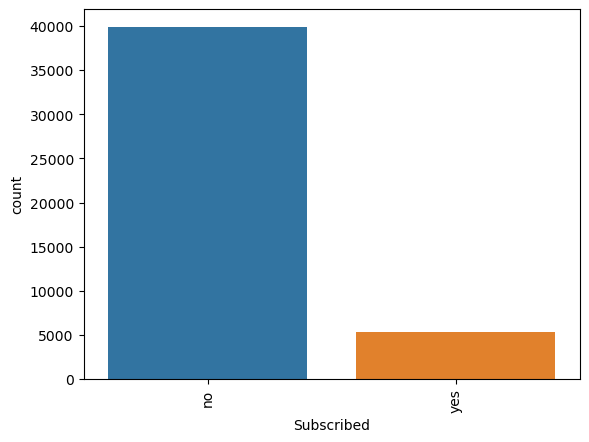

In [29]:
for i,predictor in enumerate(df.drop(columns=['age','num_calls','dur','day'])):
    plt.figure(i)
    sns.countplot(x=predictor,data=df)
    plt.xticks(rotation=90)

### Observations
Maximum number of subscriptions are happening in the month of May and least transactions are happening in December

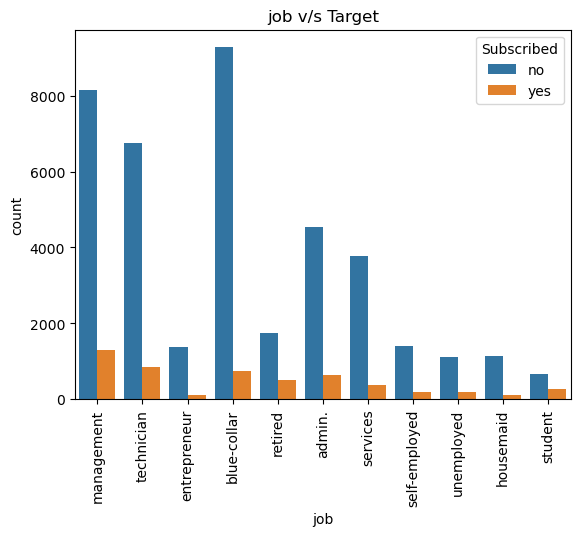

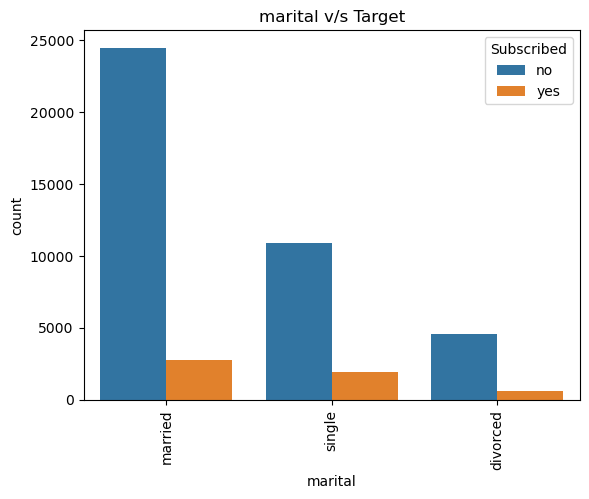

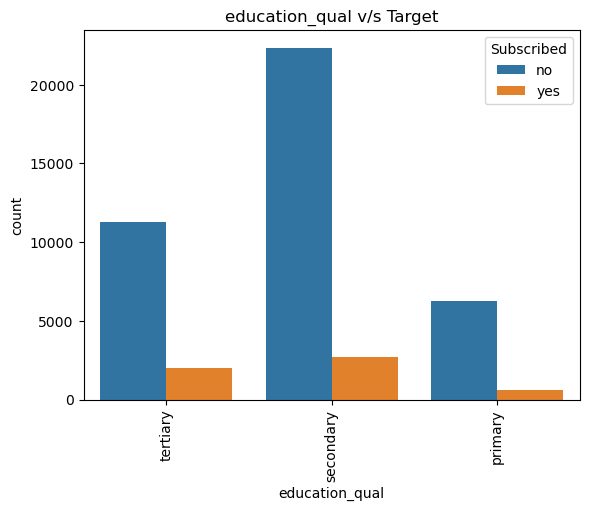

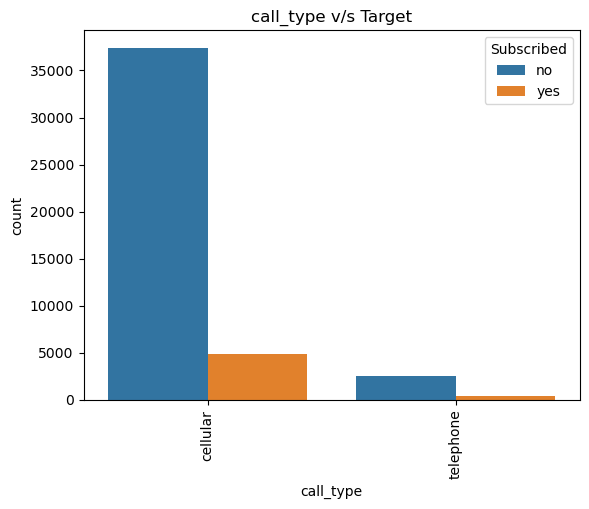

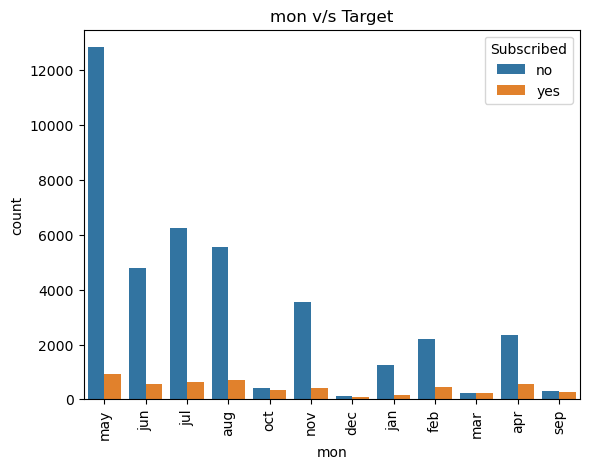

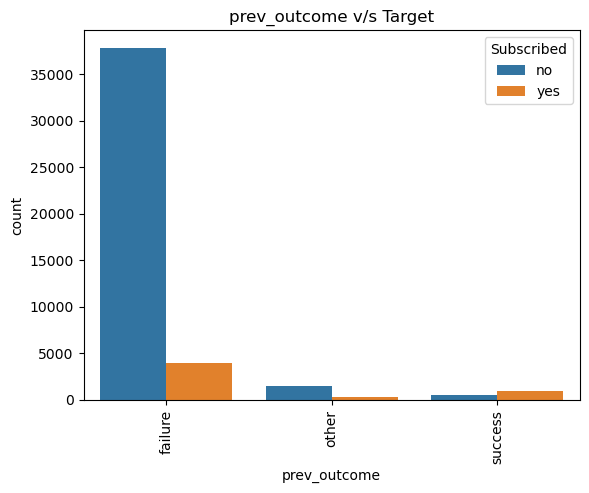

In [30]:
for i,predictor in enumerate(df.drop(columns=['age','num_calls','dur','day','Subscribed'])):
    plt.figure(i)
    sns.countplot(x=predictor,data=df,hue='Subscribed')
    plt.xticks(rotation=90)
    plt.title(f"{predictor} v/s Target")

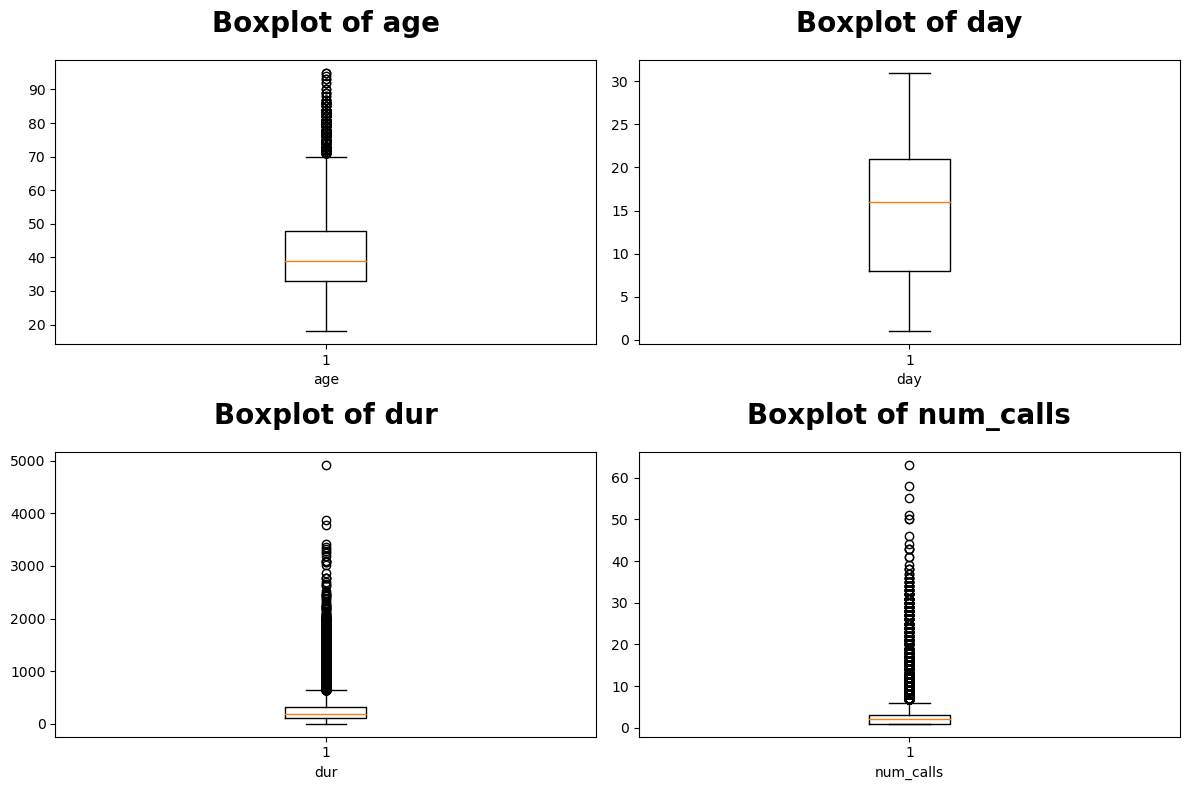

In [31]:
num_features=df.select_dtypes(include=['float','int']).columns
x=1
plt.figure(figsize=(12,8))
for i in num_features:
    plt.subplot(2,2,x)
    plt.boxplot(df[i])
    plt.title(f"Boxplot of {i}",fontweight='black',fontsize=20,pad=20)
    plt.xlabel(i)
    x+=1
plt.tight_layout()
plt.show()

#### There are no outliers in column "Day", but we can see that there are high number of outliers present in "dur", "num_calls" and "age"

In [32]:
## Handling Outliers
def remove_outliers(df,variable):
    
    upper_limit=df[variable].quantile(0.85)
    lower_limit=df[variable].quantile(0.15)
    df[variable]=np.where(df[variable]>=upper_limit,upper_limit,
                         np.where(df[variable]<=lower_limit,lower_limit,
                                 df[variable]))

In [33]:
var=['age','num_calls','dur']
for variable in var:
    remove_outliers(df,variable)

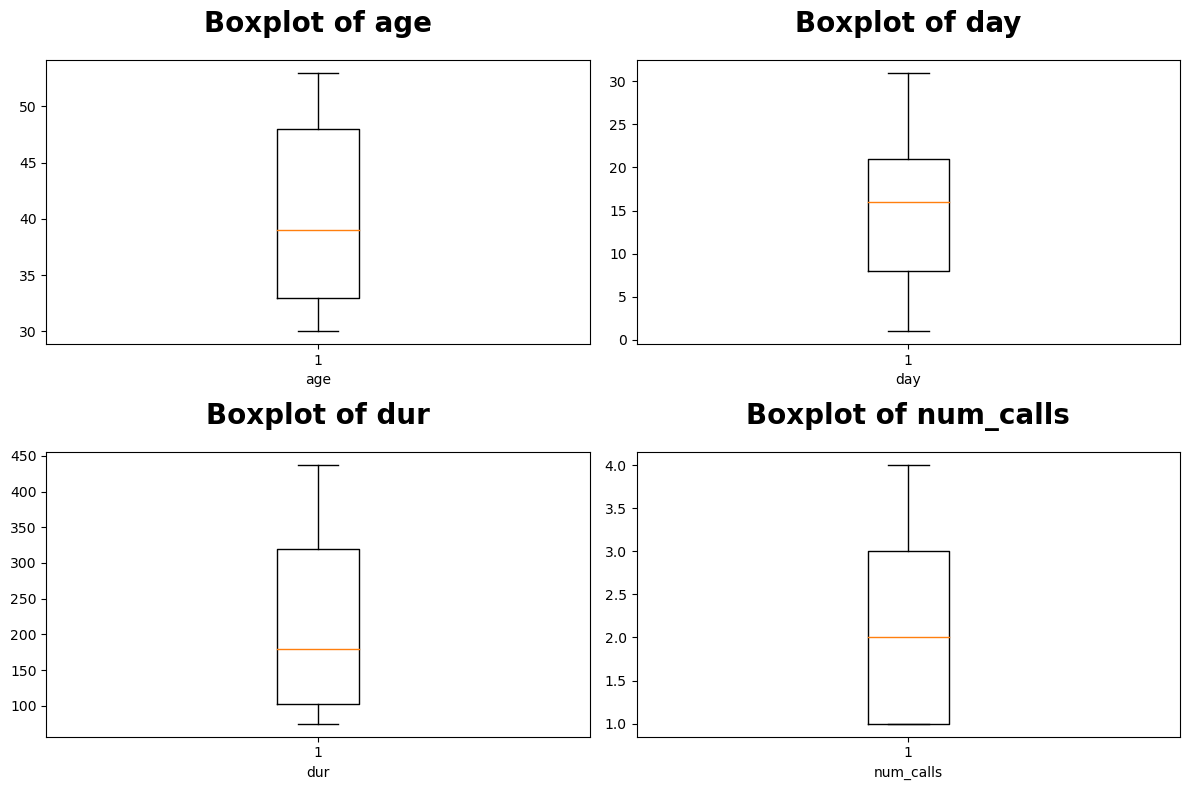

In [34]:
x=1
plt.figure(figsize=(12,8))
for i in num_features:
    plt.subplot(2,2,x)
    plt.boxplot(df[i])
    plt.title(f"Boxplot of {i}",fontweight='black',fontsize=20,pad=20)
    plt.xlabel(i)
    x+=1
plt.tight_layout()
plt.show()

In [35]:
## Categorical Encoding
categorical_columns=df.select_dtypes(include=['object']).columns
for i in categorical_columns:
    ordinal_mapping={k:i for i,k in enumerate(df[i].unique(),0)}
    df[i]=df[i].map(ordinal_mapping)

In [36]:
var=['age','num_calls']
for i in var:
    df[i]=df[i].astype(int)

In [37]:
## SMOTEENN technique to deal with imbalanced dataset
X_s=df.drop('Subscribed',axis=1)
y_s=df['Subscribed']

from imblearn.combine import SMOTEENN

smote=SMOTEENN(sampling_strategy='all')
X,y=smote.fit_resample(X_s,y_s)

In [38]:
print(len(X),len(y))

67158 67158


In [39]:
y.value_counts()/len(y)*100

Subscribed
1    56.107984
0    43.892016
Name: count, dtype: float64

### Model Building

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [42]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

In [43]:
print(X_train_scaled)

[[-0.96505147 -0.00626756  2.48176751 ... -1.37618224  0.07441696
  -0.36063286]
 [-1.0812789  -1.11758996 -0.70388394 ... -0.09200286 -0.84532672
  -0.36063286]
 [ 1.47572438 -1.11758996 -0.70388394 ... -0.64101009  0.99416065
  -0.36063286]
 ...
 [ 1.47572438 -1.11758996 -0.70388394 ... -0.40518554 -0.84532672
  -0.36063286]
 [ 0.08099532 -0.00626756 -0.70388394 ... -0.10044234 -0.84532672
  -0.36063286]
 [ 0.77835985 -0.74714916 -0.70388394 ... -0.45361327  0.07441696
  -0.36063286]]


In [44]:
print(X_test_scaled)

[[-1.19750632 -1.11758996  0.88894179 ... -0.13030185 -0.84532672
  -0.36063286]
 [-0.0352321  -0.74714916  0.88894179 ... -1.37618224  0.99416065
  -0.36063286]
 [-1.0812789  -1.11758996  0.88894179 ...  0.97145083 -0.84532672
  -0.36063286]
 ...
 [-0.38391437 -0.74714916  0.88894179 ... -0.99418102  0.07441696
  -0.36063286]
 [-1.0812789  -1.11758996  0.88894179 ...  1.23295813  1.91390433
  -0.36063286]
 [-0.50014179 -0.74714916 -0.70388394 ...  1.23295813 -0.84532672
  -0.36063286]]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,confusion_matrix

### Logistic Regression

In [46]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr=lr.predict(X_test_scaled)

lr_aucroc=roc_auc_score(y_test,y_pred_lr)*100
lr_accuracy=accuracy_score(y_test,y_pred_lr)*100
lr_f1score=f1_score(y_test,y_pred_lr)

print("AUCROC of Logistic Regression:",lr_aucroc)
print("Accuracy of Logistic Regression:",lr_accuracy)
print("F1 Score of Logistic Regression:",lr_accuracy)

AUCROC of Logistic Regression: 86.36408739061864
Accuracy of Logistic Regression: 86.70339487790352
F1 Score of Logistic Regression: 86.70339487790352


In [47]:
cml=confusion_matrix(y_test,y_pred_lr)
cml

array([[4875,  940],
       [ 846, 6771]], dtype=int64)

### Decision Tree Classifier

In [48]:
dt=DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)
y_pred_dt=dt.predict(X_test_scaled)

dt_aucroc=roc_auc_score(y_test,y_pred_dt)*100
dt_accuracy=accuracy_score(y_test,y_pred_dt)*100
dt_f1score=f1_score(y_test,y_pred_dt)

print("AUCROC of Decision Tree Classifier:",dt_aucroc)
print("Accuracy of Decision Tree Classifier:",dt_accuracy)
print("F1 Score of Decision Tree Classifier:",dt_accuracy)

AUCROC of Decision Tree Classifier: 93.36750250124992
Accuracy of Decision Tree Classifier: 93.61971411554497
F1 Score of Decision Tree Classifier: 93.61971411554497


In [49]:
cmdt=confusion_matrix(y_test,y_pred_dt)
cmdt

array([[5320,  495],
       [ 362, 7255]], dtype=int64)

### Random Forest Classifier

In [50]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
y_pred_rf=rf.predict(X_test_scaled)

rf_aucroc=roc_auc_score(y_test,y_pred_rf)*100
rf_accuracy=accuracy_score(y_test,y_pred_rf)*100
rf_f1score=f1_score(y_test,y_pred_rf)

print("AUCROC of Random Forest Classifier:",rf_aucroc)
print("Accuracy of Random Forest Classifier:",rf_accuracy)
print("F1 Score of Random Forest Classifier:",rf_accuracy)

AUCROC of Random Forest Classifier: 95.43378723272636
Accuracy of Random Forest Classifier: 95.71173317450864
F1 Score of Random Forest Classifier: 95.71173317450864


In [51]:
cmrf=confusion_matrix(y_test,y_pred_rf)
cmrf

array([[5429,  386],
       [ 190, 7427]], dtype=int64)

### SVM

In [52]:
svm=svm.SVC(kernel='linear')
svm.fit(X_train_scaled,y_train)
y_pred_svm=svm.predict(X_test_scaled)

svm_aucroc=roc_auc_score(y_test,y_pred_svm)*100
svm_accuracy=accuracy_score(y_test,y_pred_svm)*100
svm_f1score=f1_score(y_test,y_pred_svm)

print("AUCROC of SVM:",svm_aucroc)
print("Accuracy of SVM:",svm_accuracy)
print("F1 Score of SVM:",svm_accuracy)

AUCROC of SVM: 86.14579371774522
Accuracy of SVM: 86.56194163192377
F1 Score of SVM: 86.56194163192377


In [53]:
cmsvm=confusion_matrix(y_test,y_pred_svm)
cmsvm

array([[4829,  986],
       [ 819, 6798]], dtype=int64)

In [54]:
final_data=pd.DataFrame({
    "Models":['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine'],
    "Accuracy":[lr_accuracy,dt_accuracy,rf_accuracy,svm_accuracy],
    "F1 Score":[lr_f1score,dt_f1score,rf_f1score,svm_f1score],
    "AUCROC":[lr_aucroc,dt_aucroc,rf_accuracy,svm_aucroc]
})
final_data

,Models,Accuracy,F1 Score,AUCROC
0,Logistic Regression,86.703395,0.883481,86.364087
1,Decision Tree,93.619714,0.944231,93.367503
2,Random Forest,95.711733,0.962670,95.711733
3,Support Vector Machine,86.561942,0.882800,86.145794


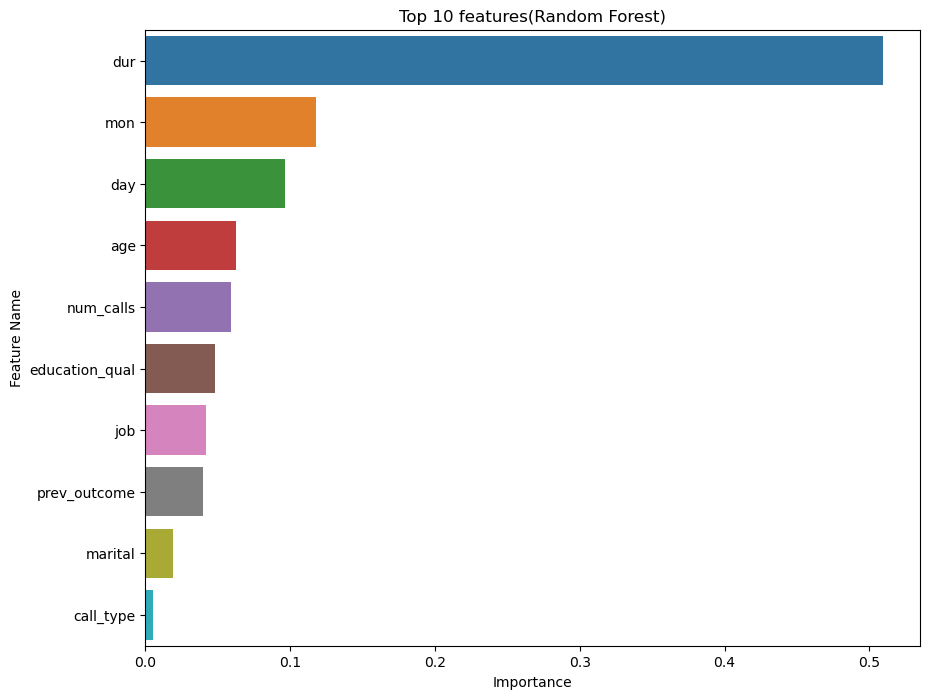

In [55]:
imp_features=pd.DataFrame({
    'Feature Name':X_train.columns,
    'Importance':rf.feature_importances_
})

fi=imp_features.sort_values(by='Importance',ascending=False)
f2=fi.head(10)

plt.figure(figsize=(10,8))
sns.barplot(data=f2,x='Importance',y='Feature Name')
plt.title('Top 10 features(Random Forest)')
plt.xlabel('Importance',fontsize=10)
plt.ylabel('Feature Name',fontsize=10)
plt.show()

### Conclusion

From the above training we can see that Decision Tree and Random Forest are the best models showing the accuracy of 94% and 96% respectively.Logistic Regression and SVM are showing the f1 score of 0.88 and AUROC score of 86%. We can go ahead with either Decision tree or Random forest for predicting whether the customer will subscribe to the insurance or not. We can also see that duration, month, day and age are the top 4 features which can impact the outcome of the marketing campaign. The company can strategize its campaign on the basis of these 4 features to get the positive result for the campaign

### Saving the model for deployment

In [56]:
import pickle
pickle.dump(rf,open("randomforest.pkl",'wb'))

In [58]:
pickled_model=pickle.load(open('randomforest.pkl','rb'))